**Project Overview**

Data tersebut terkait dengan kampanye pemasaran langsung (panggilan telepon) dari lembaga perbankan Portugis. Seringkali, diperlukan lebih dari satu kontak ke klien yang sama, untuk mengakses apakah produk (deposito berjangka bank) akan berlangganan ('ya') atau tidak ('tidak').

Ada empat kumpulan data:

- bank-additional-full.csv dengan semua contoh (41188) dan 20 masukan, diurutkan berdasarkan tanggal (dari Mei 2008 hingga November 2010), sangat mirip dengan data yang dianalisis di [Moro et al., 2014]
- bank-additional.csv dengan 10% contoh (4119), dipilih secara acak dari 1), dan 20 input.
- bank-full.csv dengan semua contoh dan 17 masukan, diurutkan berdasarkan tanggal (versi lama kumpulan data ini dengan masukan lebih sedikit).
- bank.csv dengan 10% contoh dan 17 masukan, dipilih secara acak dari 3 (versi lama kumpulan data ini dengan masukan lebih sedikit).

Kumpulan data terkecil disediakan untuk menguji algoritme pembelajaran mesin yang lebih menuntut komputasi (misalnya, SVM).

Tujuan klasifikasi adalah untuk memprediksi apakah nasabah akan berlangganan (ya/tidak) deposito berjangka (variabel y).


**Tujuan Klasifikasi**

Untuk memprediksi apakah klien akan berlangganan (ya/tidak) deposit berjangka (variabel y)

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Gcolab/bank-full.csv', sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.shape

(45211, 17)

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

# Vusialisasi Data

In [ ]:
Pilihan = pd.DataFrame({"total":df['y'].value_counts(), "presentase":(df['y'].value_counts()/df.shape[0])*100})
Pilihan

,total,presentase
no,39922,88.30152
yes,5289,11.69848


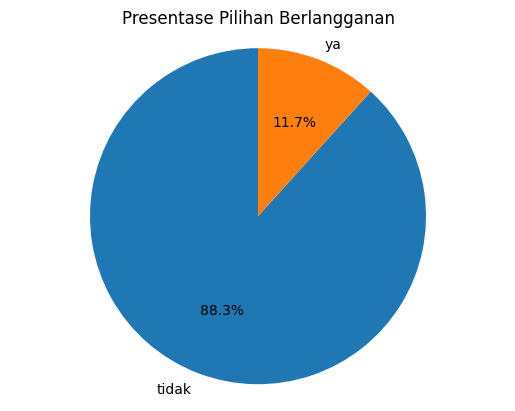

In [ ]:
jumlah = Pilihan['total']
label = ['tidak','ya']
plt.pie(jumlah, labels=label, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Presentase Pilihan Berlangganan')
plt.show()

Yang memilih untuk berlangganan sebesar 11.7% dan yang tidak memilih untuk berlangganan sebesar 88.3%

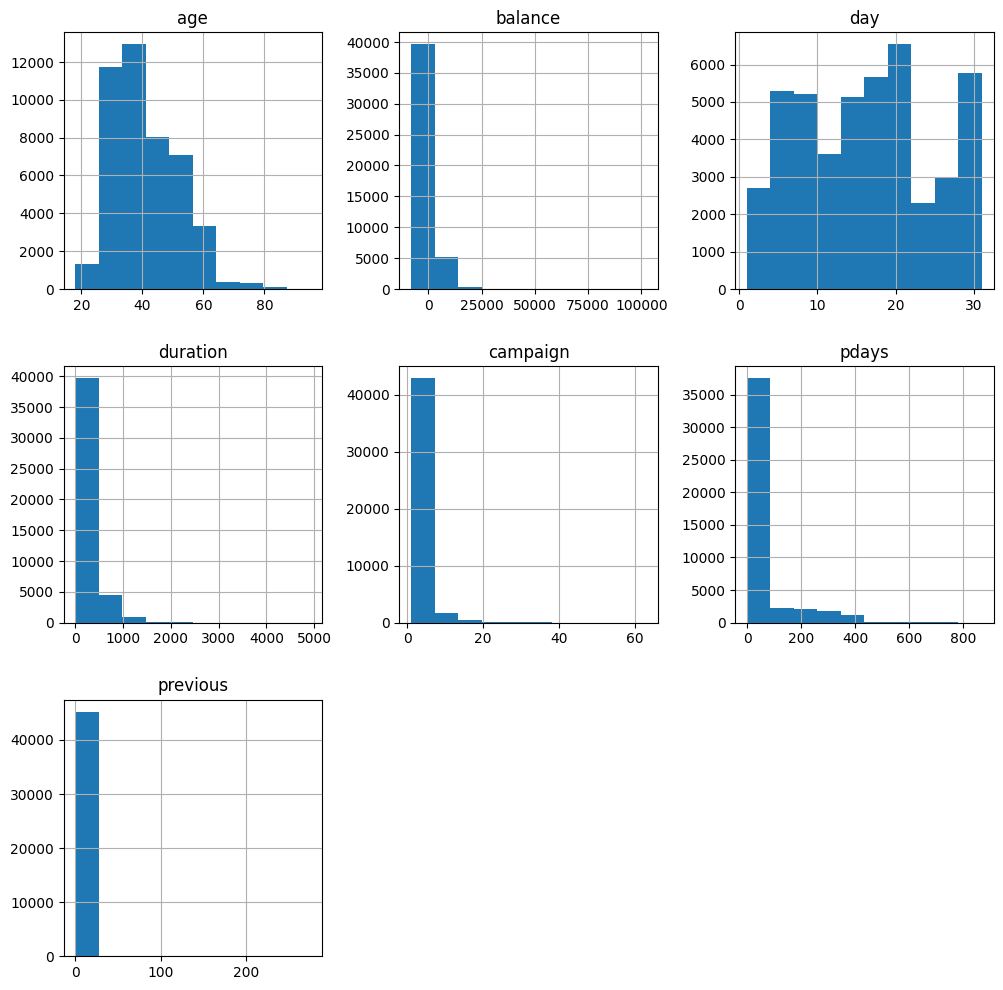

In [ ]:
df.hist(figsize=(12,12))
plt.show()

In [ ]:
n = df.select_dtypes(include=["int64"]).columns.values
n

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous'], dtype=object)

In [ ]:
cor=df.corr()
cor

<ipython-input-13-7a446f931109>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


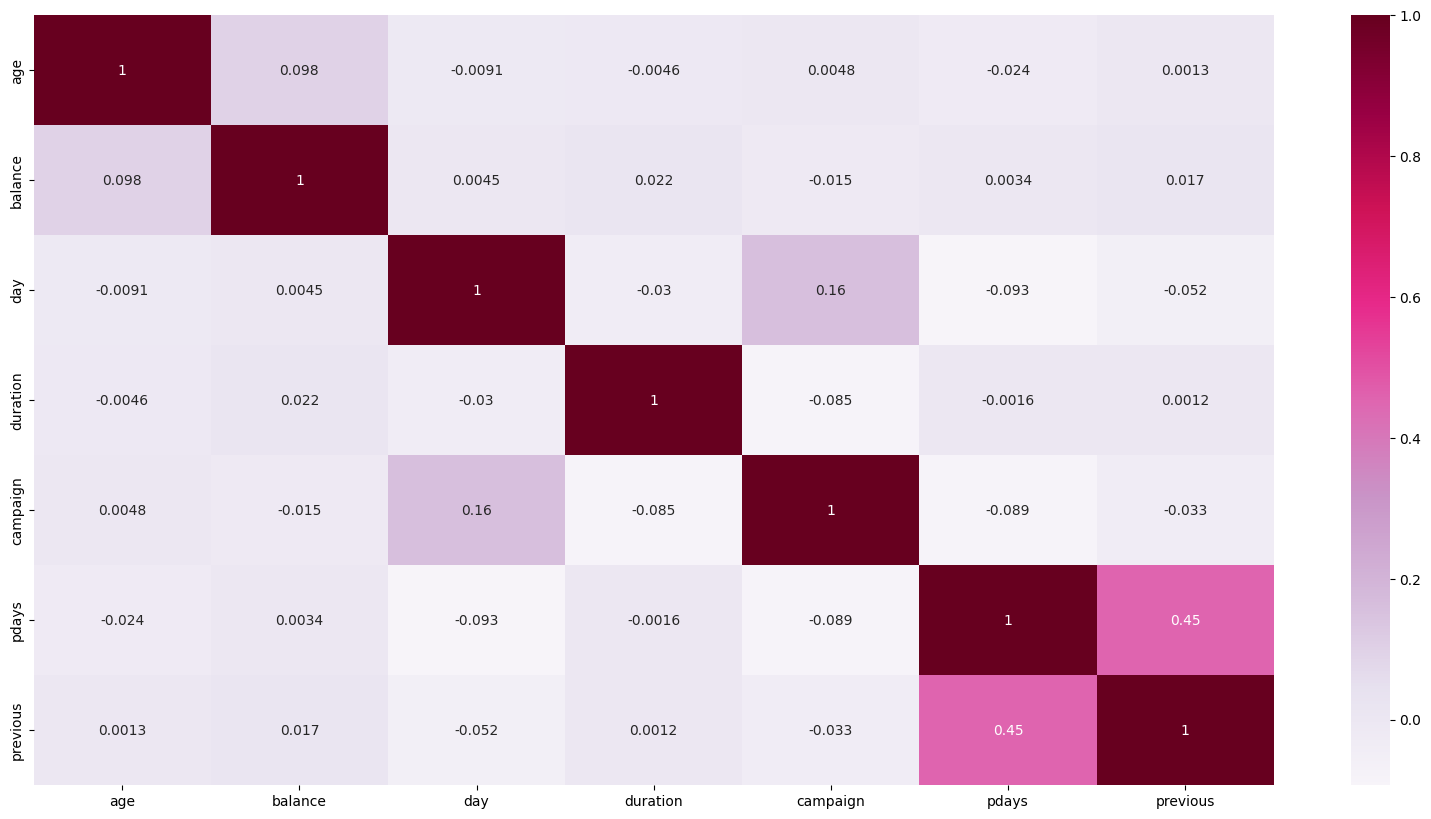

In [ ]:
plt.subplots(figsize=(20, 10))
sns.heatmap(cor, cmap="PuRd", annot=True)
plt.show()

In [ ]:
categ_var = df.select_dtypes(include=["object"]).columns.values
print(categ_var)

['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'poutcome' 'y']


In [ ]:
X = df.drop("y", axis=1)
y = df["y"]

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

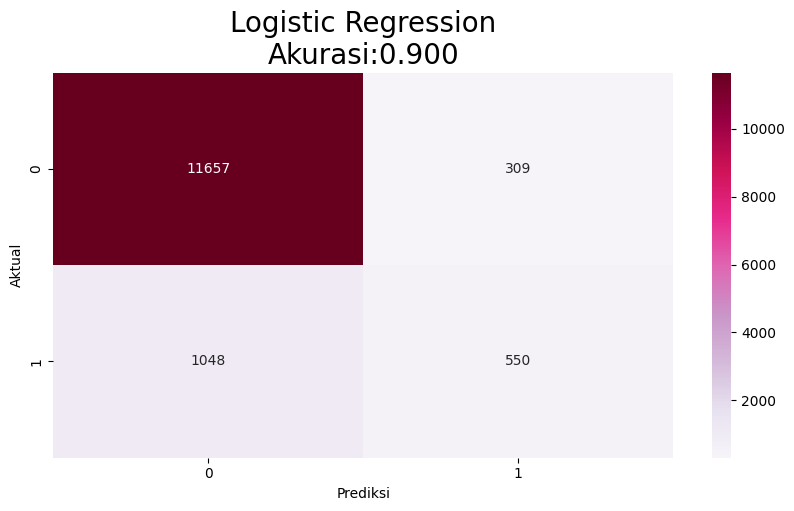

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="PuRd", annot_kws={"fontsize":10})
plt.title("Logistic Regression\nAkurasi:{:.3f}".format(accuracy_score(y_test, y_pred)), fontsize=20)
plt.xlabel("Prediksi", fontsize=10)
plt.ylabel("Aktual", fontsize=10)
plt.show()


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.97      0.94     11966
         yes       0.64      0.34      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564



# K-Nearest Neighbors

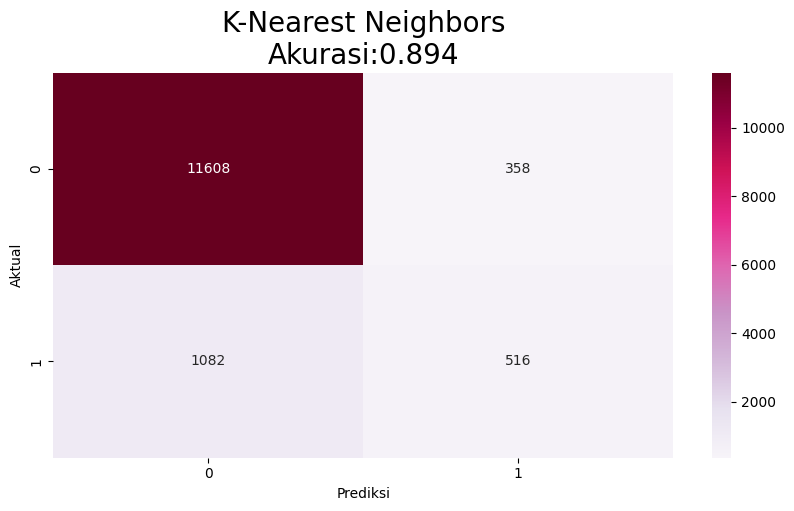

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="PuRd", annot_kws={"fontsize":10})
plt.title("K-Nearest Neighbors\nAkurasi:{:.3f}".format(accuracy_score(y_test, y_pred)), fontsize=20)
plt.xlabel("Prediksi", fontsize=10)
plt.ylabel("Aktual", fontsize=10)
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          no       0.91      0.97      0.94     11966
         yes       0.59      0.32      0.42      1598

    accuracy                           0.89     13564
   macro avg       0.75      0.65      0.68     13564
weighted avg       0.88      0.89      0.88     13564



# Support Vector Machine

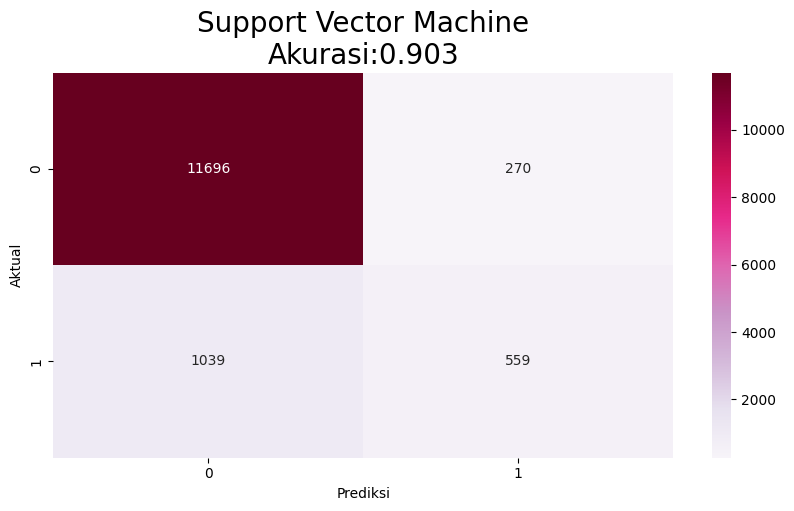

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="PuRd", annot_kws={"fontsize":10})
plt.title("Support Vector Machine\nAkurasi:{:.3f}".format(accuracy_score(y_test, y_pred)), fontsize=20)
plt.xlabel("Prediksi", fontsize=10)
plt.ylabel("Aktual", fontsize=10)
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.98      0.95     11966
         yes       0.67      0.35      0.46      1598

    accuracy                           0.90     13564
   macro avg       0.80      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



# Decision Tree

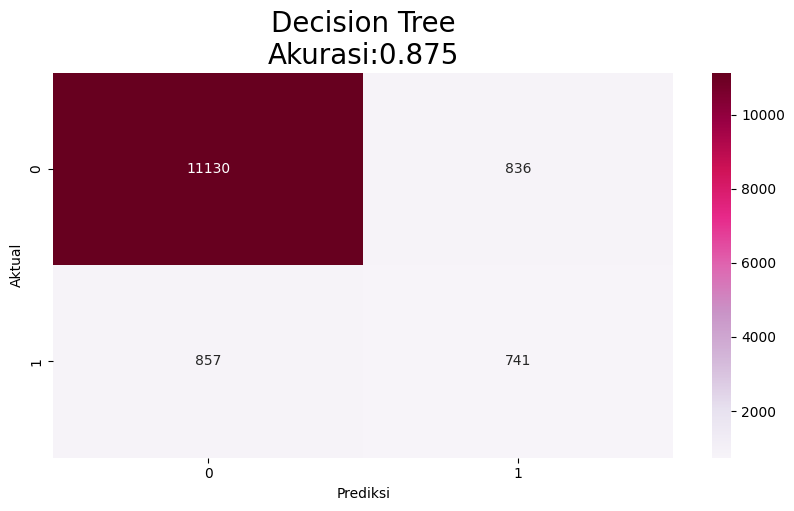

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="PuRd", annot_kws={"fontsize":10})
plt.title("Decision Tree\nAkurasi:{:.3f}".format(accuracy_score(y_test, y_pred)), fontsize=20)
plt.xlabel("Prediksi", fontsize=10)
plt.ylabel("Aktual", fontsize=10)
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.93      0.93     11966
         yes       0.47      0.46      0.47      1598

    accuracy                           0.88     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.87      0.88      0.87     13564



# Random Forest

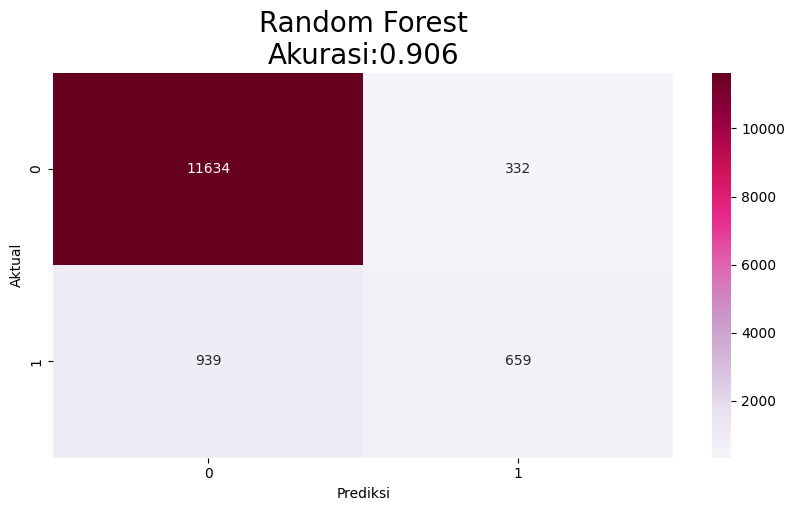

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="PuRd", annot_kws={"fontsize":10})
plt.title("Random Forest\nAkurasi:{:.3f}".format(accuracy_score(y_test, y_pred)), fontsize=20)
plt.xlabel("Prediksi", fontsize=10)
plt.ylabel("Aktual", fontsize=10)
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.97      0.95     11966
         yes       0.66      0.41      0.51      1598

    accuracy                           0.91     13564
   macro avg       0.80      0.69      0.73     13564
weighted avg       0.89      0.91      0.90     13564



# Naive Bayes


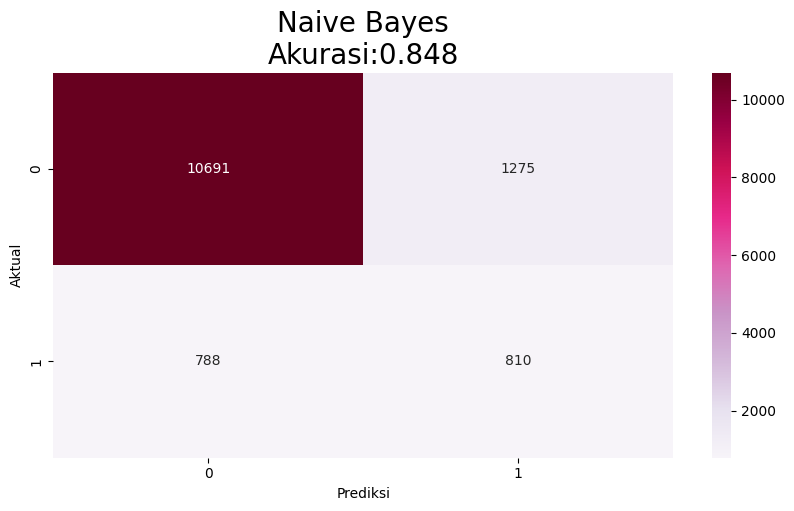

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="PuRd", annot_kws={"fontsize":10})
plt.title("Naive Bayes\nAkurasi:{:.3f}".format(accuracy_score(y_test, y_pred)), fontsize=20)
plt.xlabel("Prediksi", fontsize=10)
plt.ylabel("Aktual", fontsize=10)
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.89      0.91     11966
         yes       0.39      0.51      0.44      1598

    accuracy                           0.85     13564
   macro avg       0.66      0.70      0.68     13564
weighted avg       0.87      0.85      0.86     13564



Algoritma paling sesuai digunakan adalah Random Forest,  karena dari hasil diatas ditunjukkan bahwa akurasi Random Forest paling tinggi dibandingkan model lainnya.